# **Crowdfunding in US & GB Analysis**

----
----

Challenge kali ini didapatkan data crowdfunding di beberapa negara. Asumsikan bahwa kita akan mencoba peruntungan dengan nekat membuat usaha baru dengan pindah negara yang mana kita akan menyesuaikan dengan situasi terbaik di suatu negara yang berpeluang besar mendapatkan sumbangan modal dengan cara crowdfunding.

Dengan data tersebut kita bisa memulai analisis dengan pertanyaan :
1. Bagaimana distribusi data pada semua negara? Ini untuk mencari tahu nominal crowdfunding secara keseluruhan dan untuk setiap negara.
2. Negara mana saja yang terbanyak berhasil crowdfunding?
3. Kategori apa yang terbanyak berhasil crowdfunding?
4. Bagaimana signifikansi nilai crowdfunding terbesar dengan nilai kedua terbesarnya?

----


### Import Pustaka

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
cf = pd.read_csv('ks-projects-201801.csv')
cf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Loading data yang telah didownload lalu dibuat menjadi dataframe

In [3]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Jumlah Non Null tidak semua sama, perlu cek isnull.

In [4]:
cf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Bisa dilihat ada 2 kolom yang mempunyai nilai null

---

### Data Cleaning

In [5]:
cfcopy = cf.copy()

Menyalin ke dalam variabel dataframe baru untuk menjaga originalitas data awal

In [6]:
cleancf = cfcopy.drop('pledged', axis=1)

Setelah melihat dataframe, nilai pada kolom pledged sama dengan kolom usd_pledged. Untuk efisiensi maka kolom pledged akan didrop

In [7]:
cleancf['usd pledged'].fillna(0, inplace=True) #untuk tipe int
cleancf['name'].fillna('-',inplace=True) #untuk tipe str
cleancf.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Tahap diatas untuk mengisi nilai null pada 2 kolom yang berbeda tipe sehingga tidak ada nilai null pada dataframe

In [8]:
cleancf.rename(columns={'state':'status'},inplace=True)
cleancf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,status,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,14,US,1283.0,1283.0,19500.00


Mengganti kolom menjadi status agar lebih mudah dimengerti

-----

### Explorasi Data

In [9]:
un, cou = np.unique(cleancf['country'], return_counts=True)
dict(zip(un, cou))

{'AT': 597,
 'AU': 7839,
 'BE': 617,
 'CA': 14756,
 'CH': 761,
 'DE': 4171,
 'DK': 1113,
 'ES': 2276,
 'FR': 2939,
 'GB': 33672,
 'HK': 618,
 'IE': 811,
 'IT': 2878,
 'JP': 40,
 'LU': 62,
 'MX': 1752,
 'N,0"': 3797,
 'NL': 2868,
 'NO': 708,
 'NZ': 1447,
 'SE': 1757,
 'SG': 555,
 'US': 292627}

Data 2 terbanyak ada pada negara US (USA) dan GB (Great Britain). 2 negara tersebut yang selanjutnya akan di analisis.

In [10]:
usgb = cleancf.query("country==['US','GB']").reset_index().drop(columns='index')
usgb.head()

,ID,name,category,main_category,currency,deadline,goal,launched,status,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,14,US,1283.0,1283.0,19500.00


Memisahkan data dari negara US dan GB menjadi dataframe baru

In [11]:
usgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326299 entries, 0 to 326298
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                326299 non-null  int64  
 1   name              326299 non-null  object 
 2   category          326299 non-null  object 
 3   main_category     326299 non-null  object 
 4   currency          326299 non-null  object 
 5   deadline          326299 non-null  object 
 6   goal              326299 non-null  float64
 7   launched          326299 non-null  object 
 8   status            326299 non-null  object 
 9   backers           326299 non-null  int64  
 10  country           326299 non-null  object 
 11  usd pledged       326299 non-null  float64
 12  usd_pledged_real  326299 non-null  float64
 13  usd_goal_real     326299 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 34.9+ MB


Pengecekan kembali untuk memastikan jumlah entries ada perubahan setelah di query

In [12]:
usgb.groupby(['country'])['main_category'].value_counts()

country  main_category
GB       Film & Video      5782
         Games             4012
         Publishing        3271
         Technology        3068
         Music             2772
         Design            2706
         Art               2667
         Fashion           2372
         Food              1649
         Theater           1641
         Photography       1230
         Crafts             904
         Comics             867
         Journalism         451
         Dance              280
US       Film & Video     51922
         Music            43238
         Publishing       31726
         Games            24636
         Art              22311
         Design           21690
         Technology       21556
         Food             19941
         Fashion          16584
         Comics            8910
         Theater           8709
         Photography       7988
         Crafts            6648
         Journalism        3540
         Dance             3228
Name: main_catego

Setelah grouping terlihat category Film&Video menjadi nomor 1 untuk kedua negara tersebut.

In [13]:
usgbfv = usgb.query('main_category==["Film & Video"]').reset_index().drop(columns='index')
usgbfv.head()

,ID,name,category,main_category,currency,deadline,goal,launched,status,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,US,100.00,2421.00,30000.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,US,220.00,220.00,45000.0
2,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,14,US,1283.00,1283.00,19500.0
3,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,canceled,43,US,6240.57,6240.57,65000.0
4,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,successful,840,US,10120.00,57577.31,50000.0


melakukan query/filtering ulang untuk menganalisa kategori Film & Video saja

In [14]:
usgbfv.groupby(['country','status'])['usd_goal_real'].mean()

country  status    
GB       canceled      241947.890415
         failed        129369.918186
         live            8047.587083
         successful      6902.134062
         suspended     142388.475000
US       canceled      142951.615331
         failed        116277.391163
         live          501335.825472
         successful     11871.892956
         suspended      61056.523810
Name: usd_goal_real, dtype: float64

Tahap diatas untuk menghitung nilai total crowding dari semua status. Sedikit gambaran kalau nilai total crowd funding yang sukses pada kedua negara tersebut menjadi nilai yang paling kecil untuk masing-masing negara

Analisis selanjutnya bertujuan untuk mencari berapa crowdfunding yang berhasil di kategori Film&Video pada kedua negara terbanyak berhasil.

In [15]:
usgbfv = usgbfv[(usgbfv['status']=='successful')]

In [16]:
print('Mean :',round(usgbfv['usd_goal_real'].mean(),2))
print('Median :',usgbfv['usd_goal_real'].median())
print('Modus :',usgbfv['usd_goal_real'].mode())

Mean : 11333.19
Median : 5000.0
Modus : 0    5000.0
dtype: float64


Setelah data difilter, dilakukan ulang perhitungan central tendency. Dari nilai mean dan median yang cenderung berbeda bisa diasumsikan data tidak terdistribusi normal.

Nilai mean dan median cukup jauh sehingga perlu analisis lebih lanjut terkait perbedaan nilai di kedua negara untuk melihat apakah ada anomali.

In [17]:
print('Min :',usgbfv['usd_goal_real'].min())
print('Max :',usgbfv['usd_goal_real'].max())
print('Variance :',usgbfv['usd_goal_real'].var())
print('Std. Dev :',usgbfv['usd_goal_real'].std())
print(usgbfv['usd_goal_real'].name,'range :' , (usgbfv['usd_goal_real'].max()-usgbfv['usd_goal_real'].min()))

Min : 1.0
Max : 2000000.0
Variance : 1223988189.1530125
Std. Dev : 34985.54257336897
usd_goal_real range : 1999999.0


Range data ini terlalu besar jika mengacu pada nilai mean dan median

---

### Outlier Detection

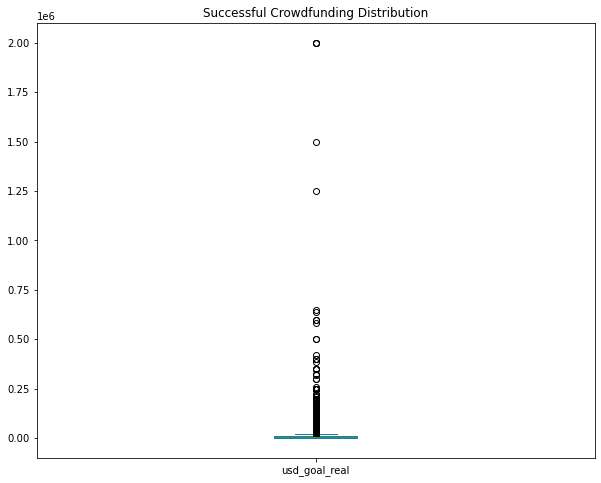

In [18]:
usgbfv['usd_goal_real'].plot(kind='box', title='Successful Crowdfunding Distribution', figsize=(10,8))
plt.show()

Dari boxplot diatas bisa disimpulkan data crowdfunding yang sukses memiliki nilai outlier. Selanjutnya akan dihilangkan terlebih dahulu nilai outlier.

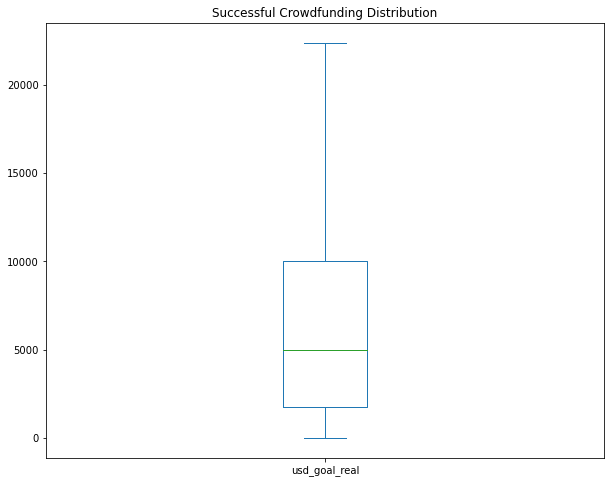

In [19]:
usgbfv['usd_goal_real'].plot(kind='box', title='Successful Crowdfunding Distribution', figsize=(10,8),showfliers=False)
plt.show()

Berikut cara cepat boxplot dalam menghilangkan outlier

Cara dibawah untuk mendetilkan cara menghilangkan outlier

Karena data tidak terdistribusi normal maka akan menggunakan Tukey's Rule untuk Outlier Detection

In [20]:
usgbfv['usd_goal_real'].quantile([0.25, 0.5, 0.75])

0.25     1750.0
0.50     5000.0
0.75    10000.0
Name: usd_goal_real, dtype: float64

The formula for Tukey outlier detection

q3+1.5∗IQR 

q1−1.5∗IQR

In [21]:
q1 = 1750
q3 = 10000
iqr = q3-q1
minimum = q1 - (1.5*iqr)
maximum = q3 + (1.5*iqr)
print("Batas Minimum Outlier =", minimum)
print("Batas Maximum Outlier =", maximum)

Batas Minimum Outlier = -10625.0
Batas Maximum Outlier = 22375.0


In [22]:
usgbfvclean = usgbfv[(usgbfv['usd_goal_real']>=minimum)& (usgbfv['usd_goal_real']<=maximum)]
usgbfvclean = pd.DataFrame(usgbfvclean[['usd_goal_real','country','status']]).reset_index().drop(columns='index')
usgbfvclean.head()

,usd_goal_real,country,status
0,10000.0,US,successful
1,8000.0,US,successful
2,11000.0,US,successful
3,9500.0,US,successful
4,4000.0,US,successful


Berikut data dari kedua negara terbanyak berhasil crowdfunding kategori Film & Video

In [23]:
usgbfvclean.describe()

,usd_goal_real
count,19482.000000
mean,5422.694975
std,5130.733805
min,1.000000
25%,1500.000000
50%,3750.000000
75%,8000.000000
max,22361.930000


In [24]:
usgbfvclean['usd_goal_real'].median()

3750.0

berikut adalah five number summary (Min, q1, median, q3, max)

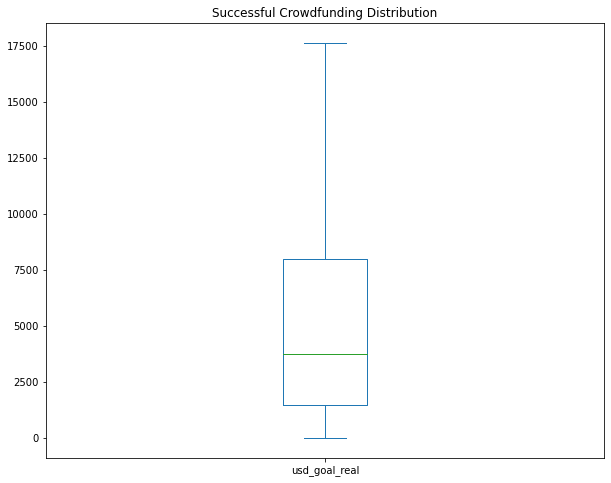

In [25]:
usgbfvclean['usd_goal_real'].plot(kind='box', title='Successful Crowdfunding Distribution', figsize=(10,8),showfliers=False)
plt.show()

Hasil boxplot setelah dihapusnya outlier sama dengan boxplot sebelumnya.

Selanjutnya ingin melihat perbedaan data crowdfunding dari kedua negara tersebut.

In [26]:
us = usgbfvclean[(usgbfvclean['country']=='US')]
gb = usgbfvclean[(usgbfvclean['country']=='GB')]

print("US Mean =", round(us['usd_goal_real'].mean(),2))
print("US Min =", round(us['usd_goal_real'].min(),2))
print("US Max =", round(us['usd_goal_real'].max(),2))
print("US STD =", round(us['usd_goal_real'].std(),2))
print("US Var =", round(us['usd_goal_real'].var(),2))
print("")
print("GB Mean =", round(gb['usd_goal_real'].mean(),2))
print("GB Min =", round(gb['usd_goal_real'].min(),2))
print("GB Max =", round(gb['usd_goal_real'].max(),2))
print("GB STD =", round(gb['usd_goal_real'].std(),2))
print("GB Var =", round(gb['usd_goal_real'].var(),2))

US Mean = 5605.82
US Min = 1.0
US Max = 22200.0
US STD = 5169.01
US Var = 26718714.3

GB Mean = 4008.11
GB Min = 1.5
GB Max = 22361.93
GB STD = 4585.66
GB Var = 21028248.1


Setelah dipisah nilai rata-rata crowdfunding dari US dan GB berbeda. Akan dilakukan Hyphotesis Testing untuk melihat perbedaan tersebut signifikan atau tidak.

----

### Hyphotesis Testing - Two Samples Independent Two Tailed

Nilai rata-rata crowdfunding di US tidak berbeda signifikan dengan di GB

H0 : μUS = μGB

H1 : μUS != μGB

In [27]:
t_stat, p_val = stats.ttest_ind(us['usd_goal_real'],gb['usd_goal_real'])
print('P-VALUE =', p_val)
print('T-Stat =', t_stat)

P-VALUE = 8.3961220928164e-44
T-Stat = 13.914380813691015


nilai p-value lebih kecil dari 0.05

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


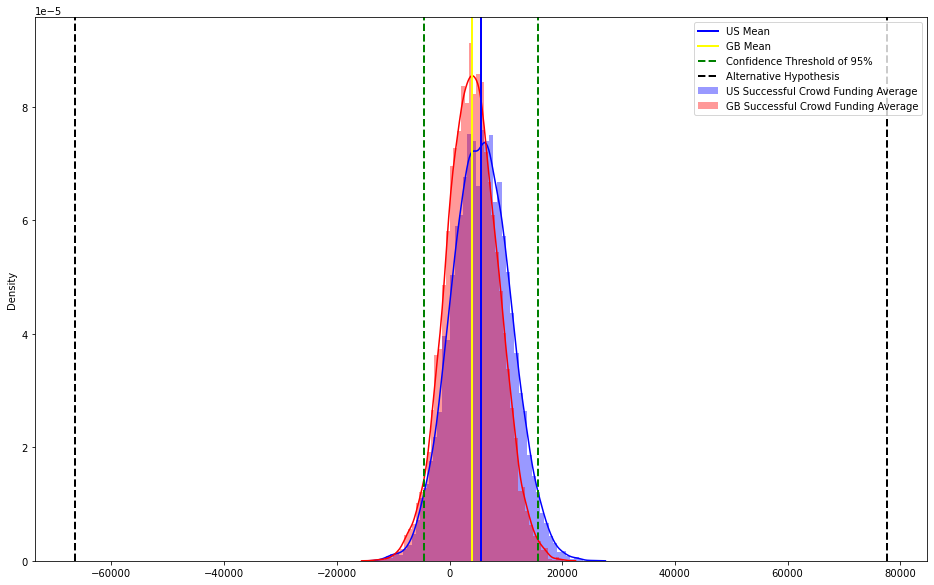

In [28]:
us_pop = np.random.normal(us.usd_goal_real.mean(),us.usd_goal_real.std(),10000)
gb_pop = np.random.normal(gb.usd_goal_real.mean(),gb.usd_goal_real.std(),10000)

ci = stats.norm.interval(0.95, us.usd_goal_real.mean(), us.usd_goal_real.std())
plt.figure(figsize=(16,10))
sns.distplot(us_pop, label="US Successful Crowd Funding Average",color="blue")
sns.distplot(gb_pop, label="GB Successful Crowd Funding Average",color="red")

plt.axvline(us.usd_goal_real.mean(), color="blue", linewidth=2, label="US Mean")
plt.axvline(gb.usd_goal_real.mean(), color="yellow", linewidth=2, label="GB Mean")

plt.axvline(ci[1], color='green', linestyle="dashed",linewidth=2,label="Confidence Threshold of 95%")
plt.axvline(ci[0], color='green', linestyle="dashed",linewidth=2)

plt.axvline(us_pop.mean()+t_stat*us_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(us_pop.mean()-t_stat*us_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Karena nilai p-value lebih kecil dari 0.05 maka kita menolak H0. Bisa disimpulkan bahwa terdapat perbedaan signifikan antara rata-rata crowdfunding di US dan GB.

----
-----

Dengan data tersebut kita bisa memulai analisis dengan pertanyaan :

1. Jumlah berhasilnya crowdfunding cukup berbeda jauh dilihat dari jumlah row data pada setiap negara.
2. Terlepas dari jumlah penduduk dan besar wilayah suatu negara, negara US dan GB akan dijadikan tujuan negara yg dipilih karena menjadi negara terbanyak yg berhasil crowdfunding.
3. Kedua negara tersebut memiliki kesamaan yaitu kategori Film & Video menjadi kategori terbanyak yang berhasil crowdfunding.
4. Terdapat perbedaan signifikan antara rata-rata crowdfunding di US dan GB yang mana linier dengan jumlah keberhasilan crowdfunding.

Dari analisis diatas bisa disimpulkan bahwa kami akan memulai crowdfunding untuk usaha di kategori Film & Video di negara US.

---
---